In [1]:
# Import libraries
import pandas as pd

In [2]:
# Load Dataset
df = pd.read_csv('car_data.csv')

In [3]:
# Display first 5 rows to understand dataset
df.head()

,car_name,brand,model,vehicle_age,km_driven,mileage,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,19.70,46.30,5,120000
1,Maruti Alto,Maruti,Alto,9,37000,20.92,67.10,5,226000
2,Maruti Wagon R,Maruti,Wagon R,8,35000,18.90,67.10,5,350000
3,Maruti Wagon R,Maruti,Wagon R,3,17512,20.51,67.04,5,410000
4,Hyundai Venue,Hyundai,Venue,2,20000,18.15,118.35,5,1050000


# a. Handling Missing Data

In [4]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 car_name         0
brand            0
model            0
vehicle_age      0
km_driven        0
mileage          0
max_power        0
seats            0
selling_price    0
dtype: int64


# b. Detect and Manage Outliers

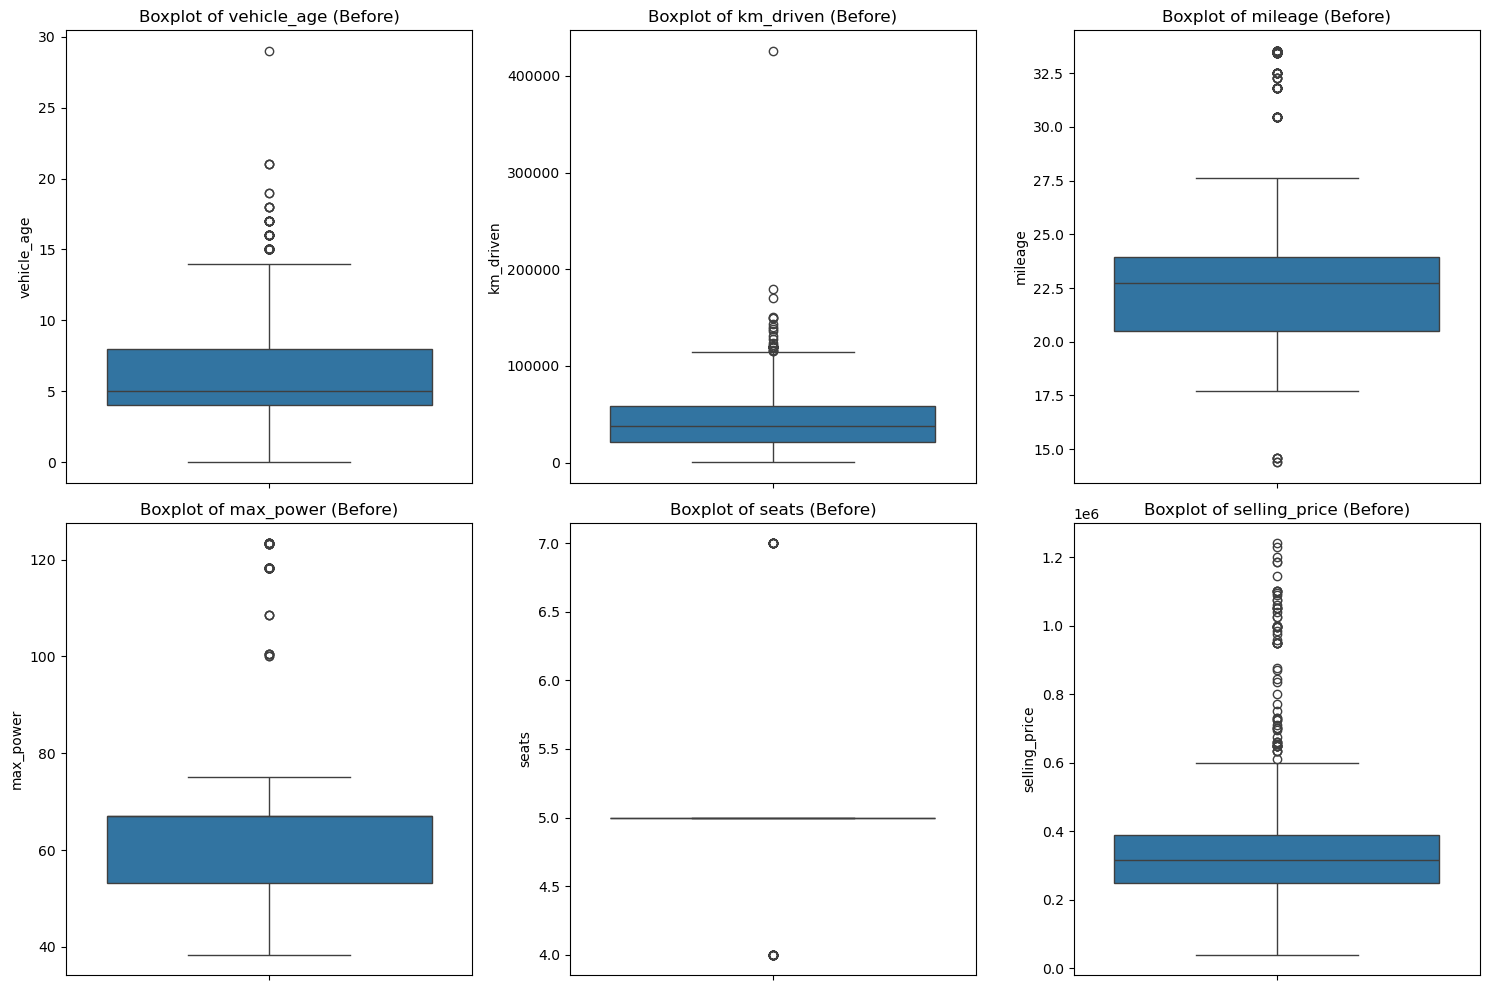

In [5]:
# Add library
import matplotlib.pyplot as plt
import seaborn as sns

# Numerical Columns
numerical_cols = ['vehicle_age', 'km_driven', 'mileage', 'max_power', 'seats', 'selling_price']

# Visualize outliers using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i) # for 6 numerical columns
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col} (Before)')
plt.tight_layout()
plt.show()

In [6]:
# Add library
import numpy as np
from scipy import stats

# Detect outliers using Z-score
z_scores = stats.zscore(df[numerical_cols])  # Returns a DataFrame
z_scores_np = z_scores.to_numpy()
outliers = (z_scores > 3)  # Threshold of 3 standard deviations

# No. of Outliers per column
print("Number of Outliers per numerical column:\n", outliers.sum())

Number of Outliers per numerical column:
 vehicle_age      21
km_driven        12
mileage          71
max_power        56
seats            12
selling_price    43
dtype: int64


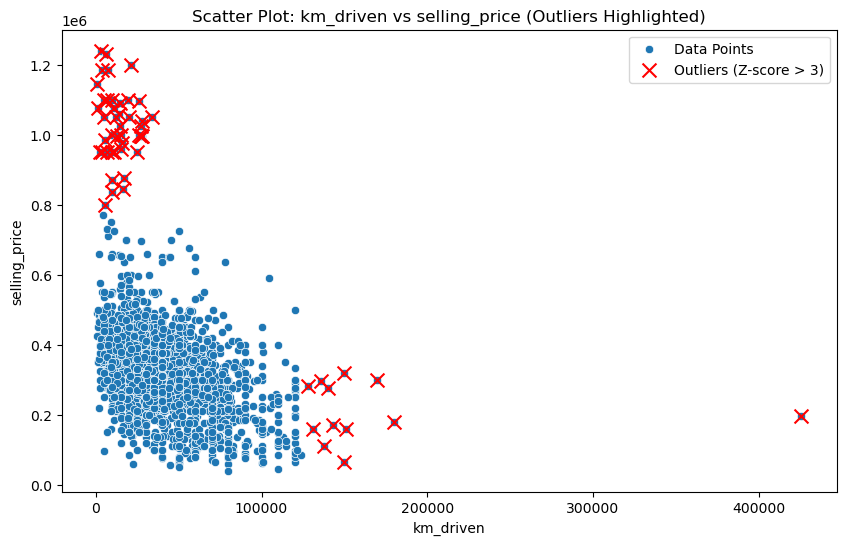

In [7]:
# Visualize outliers in a scatter plot of 'km_driven' vs 'selling_price'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='km_driven', y='selling_price', data=df, label='Data Points')

# Highlight outliers, where Z-score > 3 for either 'km_driven' or 'selling_price'
outlier_mask = (np.abs(z_scores['km_driven']) > 3) | (np.abs(z_scores['selling_price']) > 3)
plt.scatter(df.loc[outlier_mask, 'km_driven'], df.loc[outlier_mask, 'selling_price'], 
            color='red', label='Outliers (Z-score > 3)', marker='x', s=100)
plt.title('Scatter Plot: km_driven vs selling_price (Outliers Highlighted)')
plt.xlabel('km_driven')
plt.ylabel('selling_price')
plt.legend()
plt.show()

In [8]:
# Manage outliers:
# Capping them using 5th and 95th percentiles
df_capped = df.copy()  # Preserve original data
for col in numerical_cols:
    lower_bound = df[col].quantile(0.05)  # 2nd percentile
    upper_bound = df[col].quantile(0.95)  # 98th percentile
    # Use pandas clip and infer objects to avoid downcasting warning
    df_capped[col] = df[col].clip(lower_bound, upper_bound).infer_objects(copy=False)

# Ensuring float columns stay as float
for col in ['mileage', 'max_power']:
    if col in df_capped.columns:
        df_capped[col] = df_capped[col].astype(float)

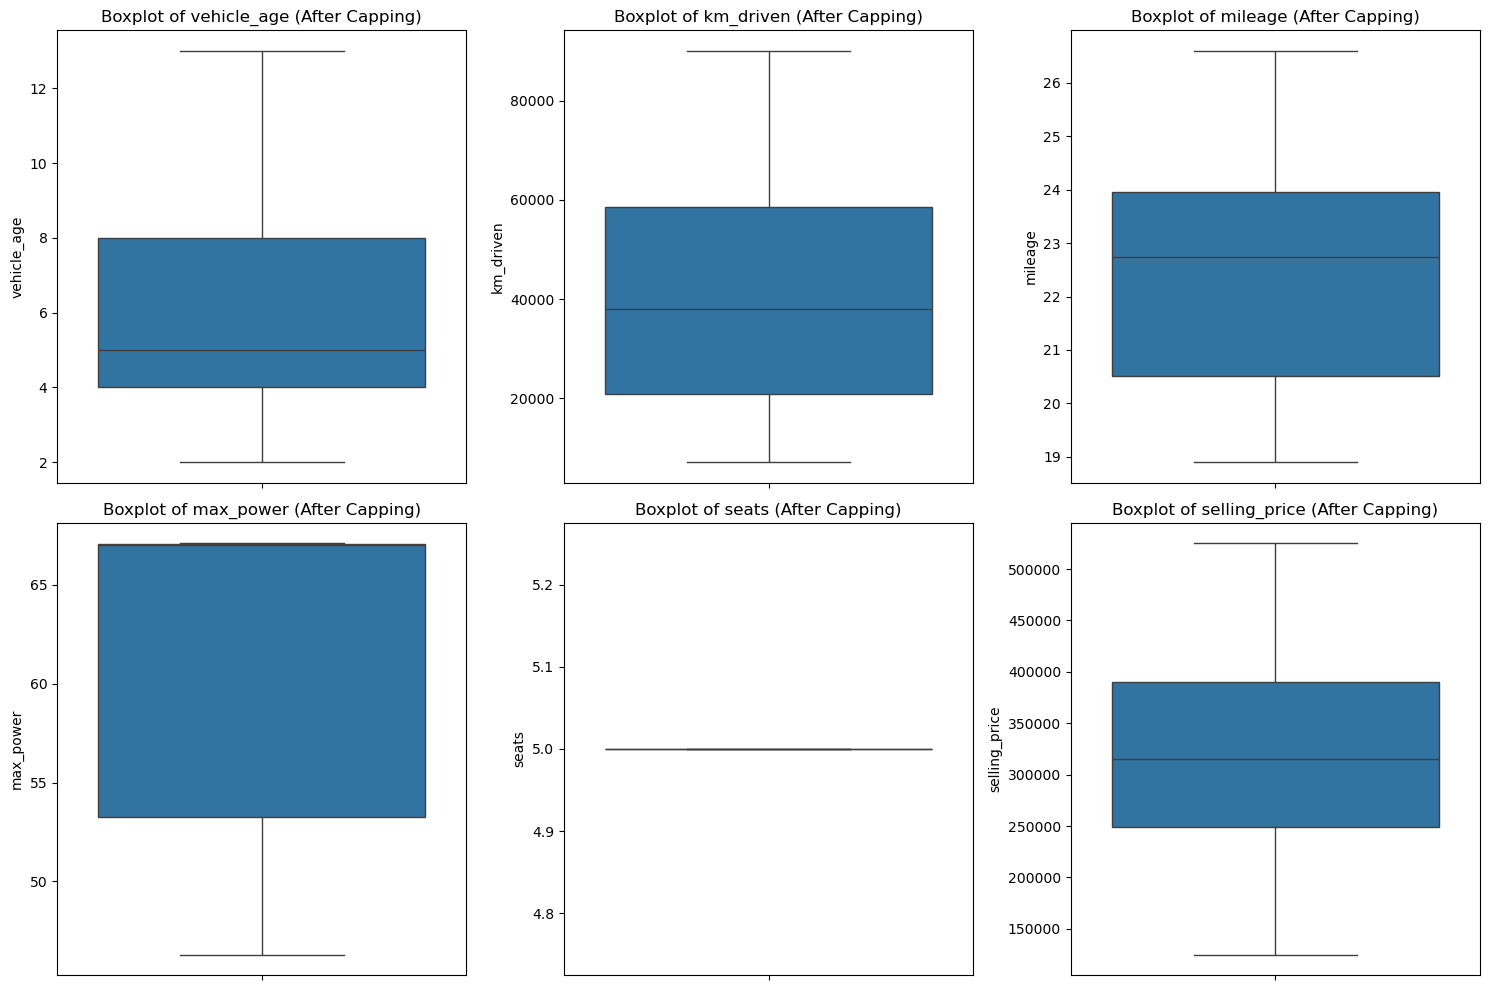

In [9]:
# Visualize outliers after capping using boxplots
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df_capped[col])
    plt.title(f'Boxplot of {col} (After Capping)')
plt.tight_layout()
plt.show()

In [10]:
# Update the dataset
df = df_capped

In [11]:
# Verifying the dataset
print("Data after capping outliers:\n", df[numerical_cols].describe())

Data after capping outliers:
        vehicle_age     km_driven      mileage    max_power   seats  \
count  2119.000000   2119.000000  2119.000000  2119.000000  2119.0   
mean      6.051439  41133.847381    22.357112    60.310571     5.0   
std       3.154010  23780.083195     2.301017     8.700940     0.0   
min       2.000000   7193.600000    18.900000    46.300000     5.0   
25%       4.000000  21000.000000    20.510000    53.260000     5.0   
50%       5.000000  38000.000000    22.740000    67.000000     5.0   
75%       8.000000  58494.000000    23.950000    67.050000     5.0   
max      13.000000  90000.000000    26.600000    67.100000     5.0   

       selling_price  
count    2119.000000  
mean   317588.013214  
std    105015.375770  
min    125000.000000  
25%    249000.000000  
50%    315000.000000  
75%    390000.000000  
max    525000.000000  


In [12]:
# Recheck outliers after capping
z_scores_after = stats.zscore(df[numerical_cols]).to_numpy()
outliers_after = (np.abs(z_scores_after) > 3)

print("Number of outliers per numerical column after capping:\n", pd.Series(outliers_after.sum(axis=0), index=numerical_cols))

Number of outliers per numerical column after capping:
 vehicle_age      0
km_driven        0
mileage          0
max_power        0
seats            0
selling_price    0
dtype: int32


# c. Data Distribution

In [13]:
# Calculate skewness for numerical features
skewness = df[numerical_cols].skew()
print("Skewness of numerical features:\n", skewness)

Skewness of numerical features:
 vehicle_age      0.751846
km_driven        0.454382
mileage          0.136352
max_power       -0.662653
seats            0.000000
selling_price    0.087584
dtype: float64


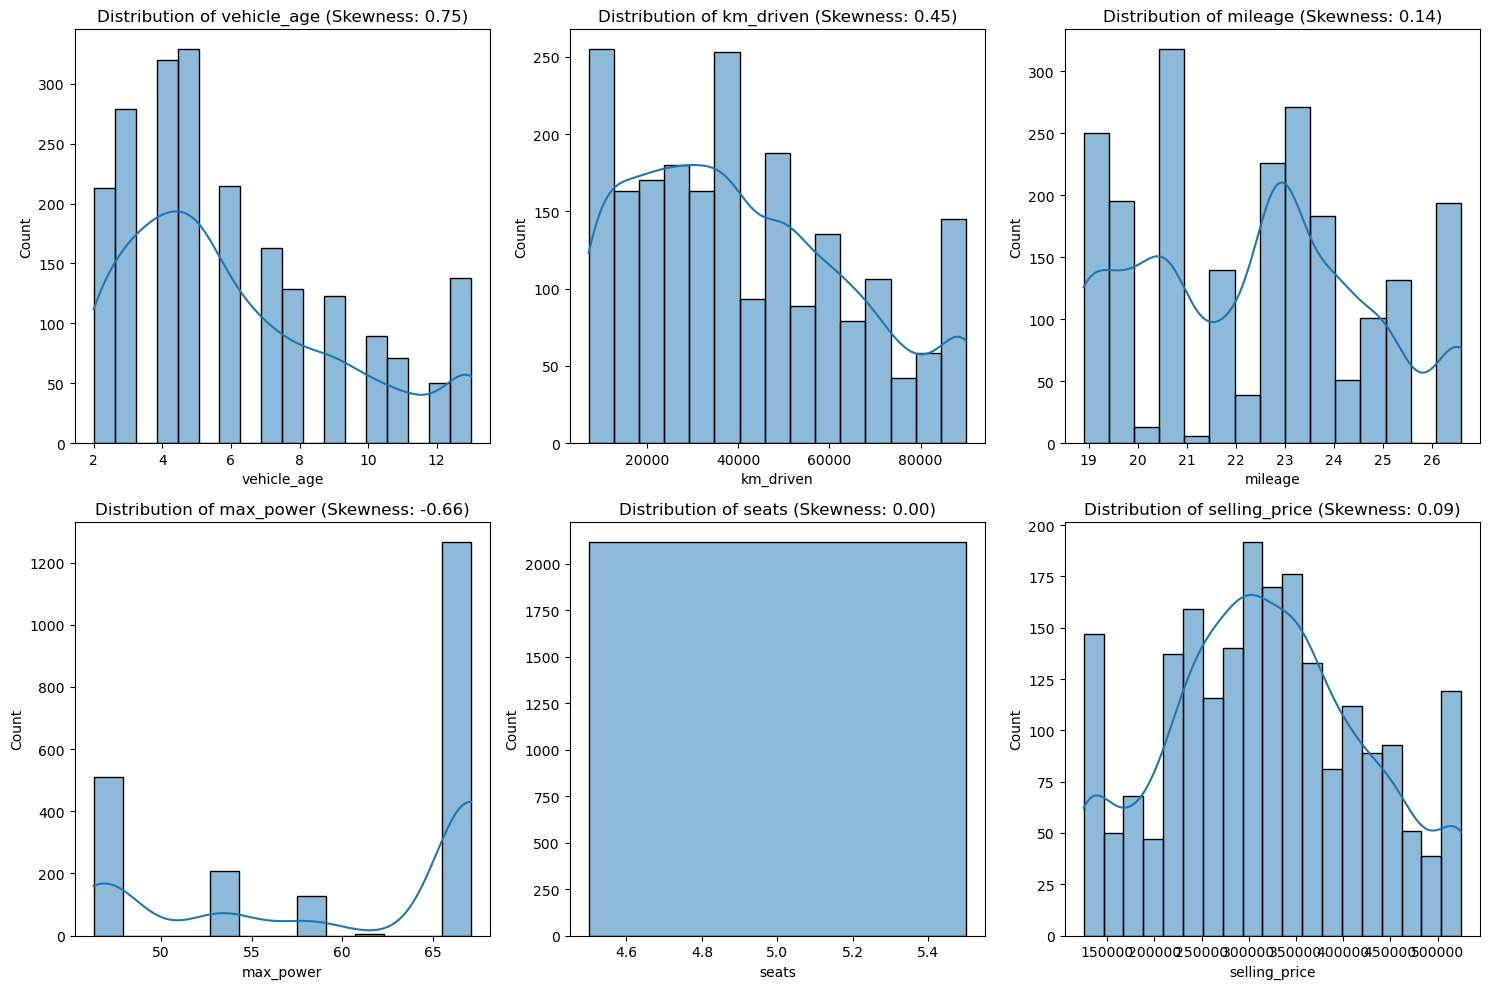

In [14]:
# Visualize distributions with Histograms and KDE
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} (Skewness: {skewness[col]:.2f})')
plt.tight_layout()
plt.show()

# d. Feature Scaling

In [15]:
# Add library
from sklearn.preprocessing import StandardScaler

# Ensure df is a DataFrame
if not isinstance(df, pd.DataFrame):
    raise TypeError("Error: df is not a pandas DataFrame. Check previous steps for reassignment to a list.")

# numerical columns (excluding selling_price as target)
numerical_cols2 = ['vehicle_age', 'km_driven', 'mileage', 'max_power', 'seats']

# drop column 'seats', it is constant (std = 0)
numerical_cols2.remove('seats')

# Standardizing numerical features
scaler = StandardScaler()
df[numerical_cols2] = scaler.fit_transform(df[numerical_cols2])

print("Scaled numerical features:\n", df[numerical_cols2].head())

Scaled numerical features:
    vehicle_age  km_driven   mileage  max_power
0     0.935082   2.055404 -1.155028  -1.610616
1     0.935082  -0.173878 -0.624702   0.780494
2     0.617950  -0.258001 -1.502782   0.780494
3    -0.967708  -0.993580 -0.802927   0.773597
4    -1.284839  -0.888930 -1.502782   0.780494


In [16]:
# Verify mean ~0 and std ~1
print("Mean of scaled features:\n", df[numerical_cols2].mean())
print("Standard deviation of scaled features:\n", df[numerical_cols2].std())

Mean of scaled features:
 vehicle_age   -1.844259e-17
km_driven      1.223917e-16
mileage        7.645292e-16
max_power      1.676599e-16
dtype: float64
Standard deviation of scaled features:
 vehicle_age    1.000236
km_driven      1.000236
mileage        1.000236
max_power      1.000236
dtype: float64


# e. Encode Categorical Variables

In [17]:
# Add library
from sklearn.preprocessing import OneHotEncoder

# Defining categorical columns
if 'car_name' in df.columns:
    df = df.drop('car_name', axis=1) # drop car_name (redundant)
    
categorical_cols = ['brand', 'model']

# One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Update dataframe
df = df_encoded

# Display encoded data
pd.options.display.float_format = '{:.2f}' .format
print("Data after encoding categorical variables:\n", df.head())
print("New columns after encoding:\n", df.columns.tolist())

Data after encoding categorical variables:
    vehicle_age  km_driven  mileage  max_power  seats  selling_price  \
0         0.94       2.06    -1.16      -1.61      5         125000   
1         0.94      -0.17    -0.62       0.78      5         226000   
2         0.62      -0.26    -1.50       0.78      5         350000   
3        -0.97      -0.99    -0.80       0.77      5         410000   
4        -1.28      -0.89    -1.50       0.78      5         525000   

   brand_Ford  brand_Hyundai  brand_Maruti  brand_Renault  ...  \
0       False          False          True          False  ...   
1       False          False          True          False  ...   
2       False          False          True          False  ...   
3       False          False          True          False  ...   
4       False           True         False          False  ...   

   model_Ecosport  model_KWID  model_Polo  model_RediGO  model_S-Presso  \
0           False       False       False         False  

# f. Perform Feature Selection

In [18]:
# Add Libraries
from sklearn.feature_selection import SelectKBest, f_regression
import pandas as pd

# Drop seats if constant (std=0)
if 'seats' in df.columns and df['seats'].std() == 0:
    print("Dropped 'seats' due to zero variance.")
    df = df.drop('seats', axis=1)

Dropped 'seats' due to zero variance.


In [19]:
# Define features and target
X = df.drop('selling_price', axis=1)
y = df['selling_price']

# Feature selection using f_regression
k = min(10, X.shape[1])  # Select top 10 features
selector = SelectKBest(score_func=f_regression, k=k)
X_selected = selector.fit_transform(X, y)

# Get selected feature names and scores
selected_features = X.columns[selector.get_support()].tolist()
feature_scores = dict(zip(X.columns, selector.scores_))
sorted_scores = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)[:k]

# Display selected features and scores
pd.options.display.float_format = '{:.2f}'.format
print("Selected features:", selected_features)

Selected features: ['vehicle_age', 'km_driven', 'max_power', 'brand_Hyundai', 'brand_Maruti', 'brand_Volkswagen', 'model_Celerio', 'model_Ecosport', 'model_Polo', 'model_Venue']


In [20]:
print("\nTop feature scores (sorted):")
for feature, score in sorted_scores:
    print(f"{feature}: {score:.2f}")


Top feature scores (sorted):
vehicle_age: 2839.69
max_power: 653.74
km_driven: 559.66
model_Celerio: 376.70
brand_Hyundai: 167.14
model_Venue: 167.14
brand_Maruti: 120.60
brand_Volkswagen: 57.76
model_Polo: 53.64
brand_Ford: 53.62


In [21]:
# Update dataframe with selected features + target
df = pd.concat([pd.DataFrame(X_selected, columns=selected_features), y.reset_index(drop=True)], axis=1)

# Display updated dataframe
print("\nData after feature selection (first 5 rows):")
print(df.head())


Data after feature selection (first 5 rows):
   vehicle_age  km_driven  max_power  brand_Hyundai  brand_Maruti  \
0         0.94       2.06      -1.61           0.00          1.00   
1         0.94      -0.17       0.78           0.00          1.00   
2         0.62      -0.26       0.78           0.00          1.00   
3        -0.97      -0.99       0.77           0.00          1.00   
4        -1.28      -0.89       0.78           1.00          0.00   

   brand_Volkswagen  model_Celerio  model_Ecosport  model_Polo  model_Venue  \
0              0.00           0.00            0.00        0.00         0.00   
1              0.00           0.00            0.00        0.00         0.00   
2              0.00           0.00            0.00        0.00         0.00   
3              0.00           0.00            0.00        0.00         0.00   
4              0.00           0.00            0.00        0.00         1.00   

   selling_price  
0         125000  
1         226000  
2      

# g. Visualize Data

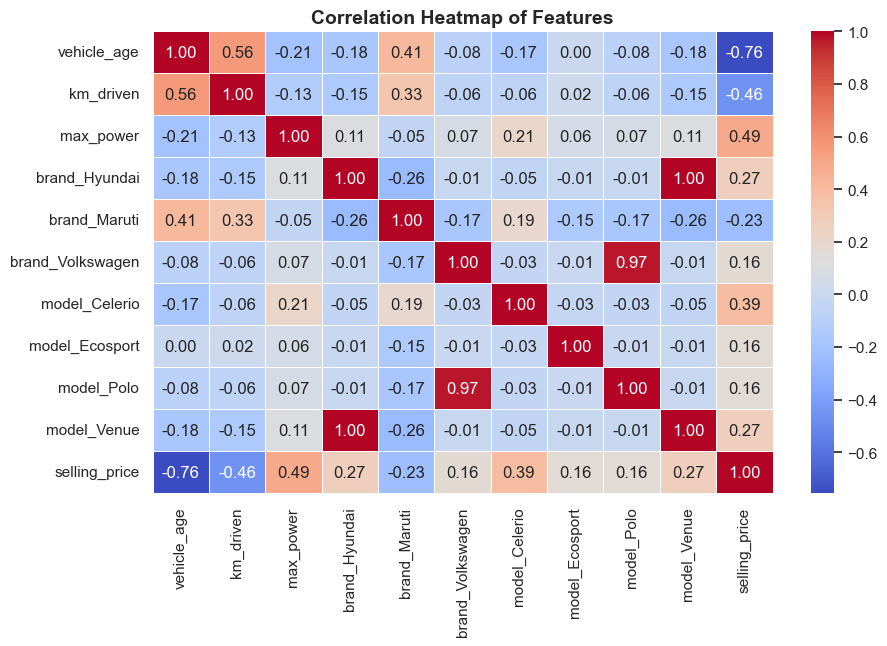

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# For a clean theme
sns.set_theme(style="whitegrid", palette="Set2")

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap of Features", fontsize=14, weight="bold")
plt.show()

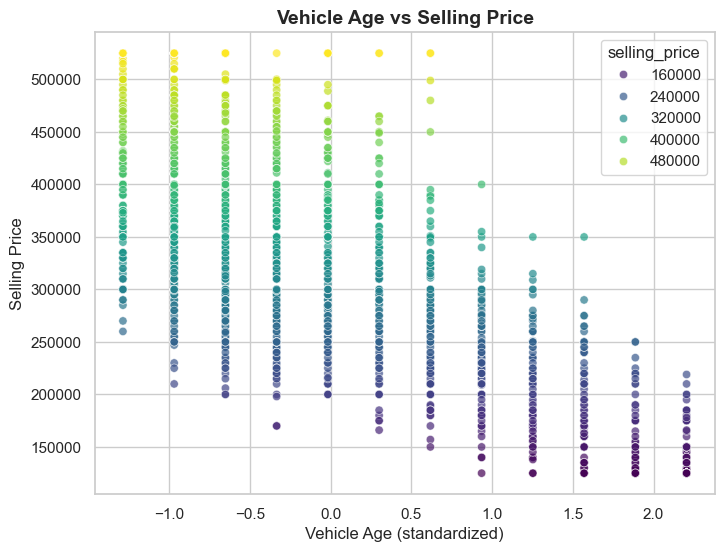

In [23]:
# Vehicle Age vs Selling Price
plt.figure(figsize=(8,6))
sns.scatterplot(x="vehicle_age", y="selling_price", data=df, hue="selling_price", palette="viridis", alpha=0.7)
plt.title("Vehicle Age vs Selling Price", fontsize=14, weight="bold")
plt.xlabel("Vehicle Age (standardized)")
plt.ylabel("Selling Price")
plt.show()

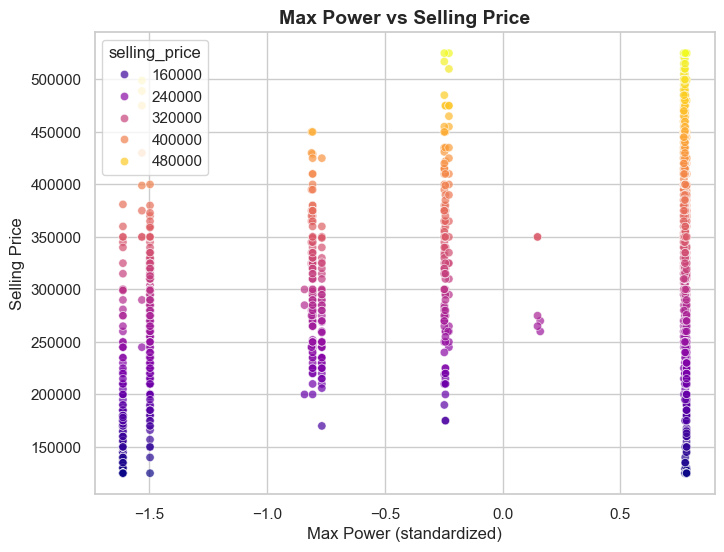

In [24]:
# Max Power vs Selling Price
plt.figure(figsize=(8,6))
sns.scatterplot(x="max_power", y="selling_price", data=df, hue="selling_price", palette="plasma", alpha=0.7)
plt.title("Max Power vs Selling Price", fontsize=14, weight="bold")
plt.xlabel("Max Power (standardized)")
plt.ylabel("Selling Price")
plt.show()

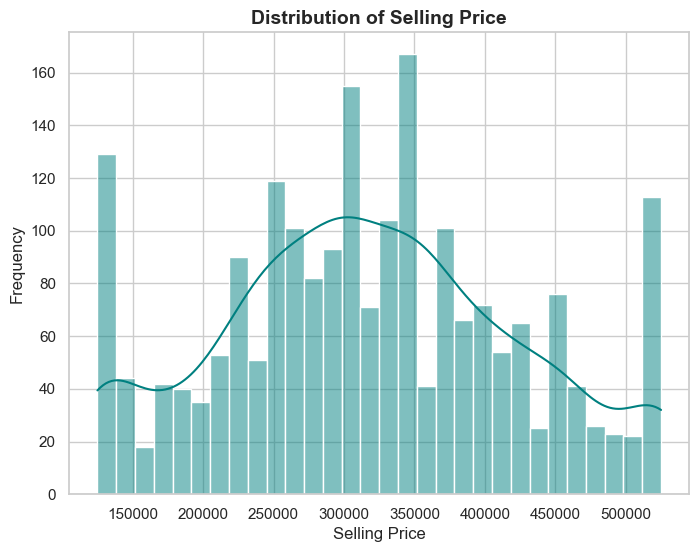

In [25]:
# Selling Price Distribution (Histogram + KDE)
plt.figure(figsize=(8,6))
sns.histplot(df["selling_price"], bins=30, kde=True, color="teal")
plt.title("Distribution of Selling Price", fontsize=14, weight="bold")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

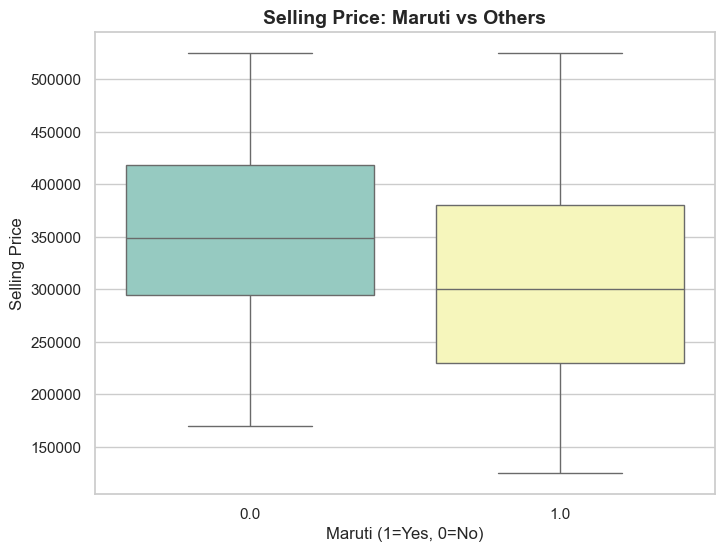

In [26]:
# Boxplot Example (Brand - needs original 'brand' column ideally)
# If you don't have 'brand', keep using encoded ones (e.g., Maruti vs Others)
plt.figure(figsize=(8,6))
sns.boxplot(x="brand_Maruti", y="selling_price", data=df, hue="brand_Maruti", palette="Set3", legend=False)
plt.title("Selling Price: Maruti vs Others", fontsize=14, weight="bold")
plt.xlabel("Maruti (1=Yes, 0=No)")
plt.ylabel("Selling Price")
plt.show()


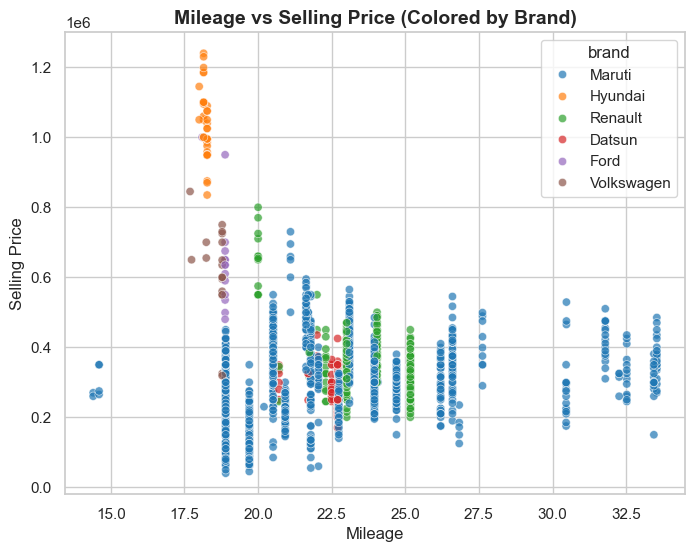

In [27]:
# Mileage vs Selling Price
df_viz = pd.read_csv("car_data.csv")

# Example: Mileage vs Selling Price
plt.figure(figsize=(8,6))
sns.scatterplot(x="mileage", y="selling_price", data=df_viz, hue="brand", palette="tab10", alpha=0.7)
plt.title("Mileage vs Selling Price (Colored by Brand)", fontsize=14, weight="bold")
plt.xlabel("Mileage")
plt.ylabel("Selling Price")
plt.show()


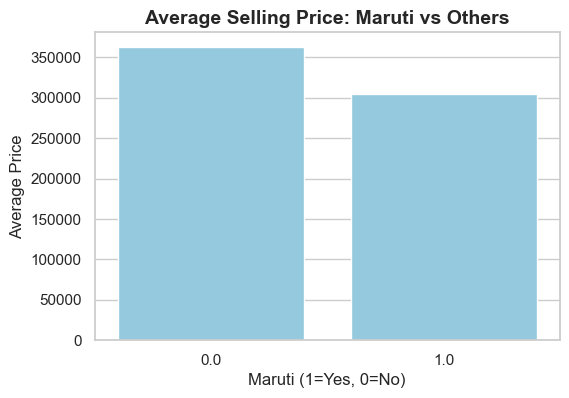

In [29]:
# Average selling price per brand
brand_price = df.groupby("brand_Maruti")["selling_price"].mean().reset_index()

# Plot
plt.figure(figsize=(6,4))
sns.barplot(x="brand_Maruti", y="selling_price", data=brand_price, color="skyblue")
plt.title("Average Selling Price: Maruti vs Others", fontsize=14, weight="bold")
plt.xlabel("Maruti (1=Yes, 0=No)")
plt.ylabel("Average Price")
plt.show()

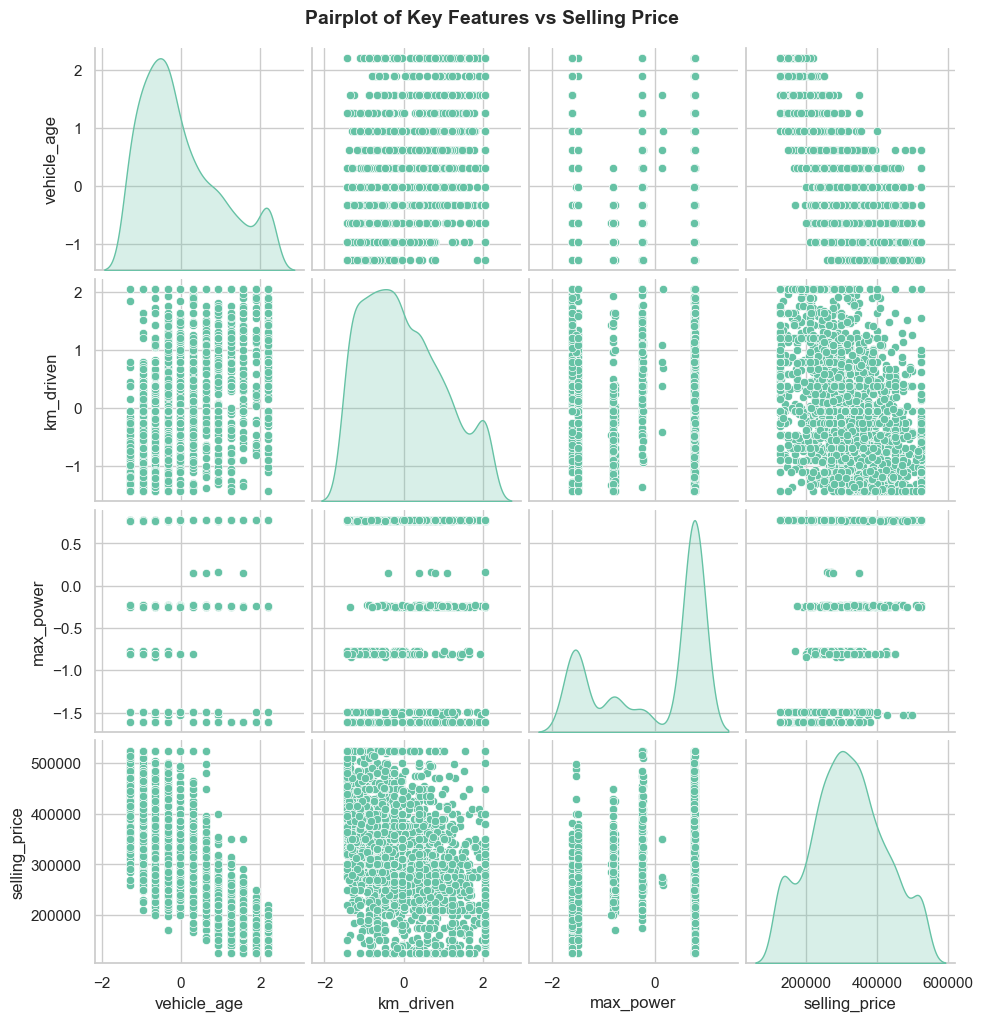

In [30]:
# Pairplot (key numerical features vs price)
sns.pairplot(df[["vehicle_age", "km_driven", "max_power", "selling_price"]],
             diag_kind="kde")
plt.suptitle("Pairplot of Key Features vs Selling Price", y=1.02, fontsize=14, weight="bold")
plt.show()